## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings("ignore")

## I. Data Analysis

a. Load data from CSV file

In [2]:
df = pd.read_csv('insurance.csv')

b. Display summary and statistical information of the data

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# compute correlation coefficent between variables
pearson_corr = df.corr(method='pearson')
pearson_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

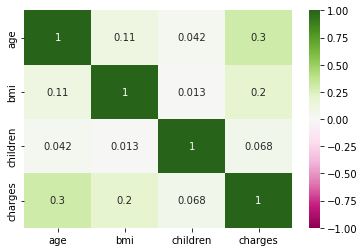

In [11]:
# plot correlation coefficent using heatmap
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)

## Exploratory Data Analysis (EDA)

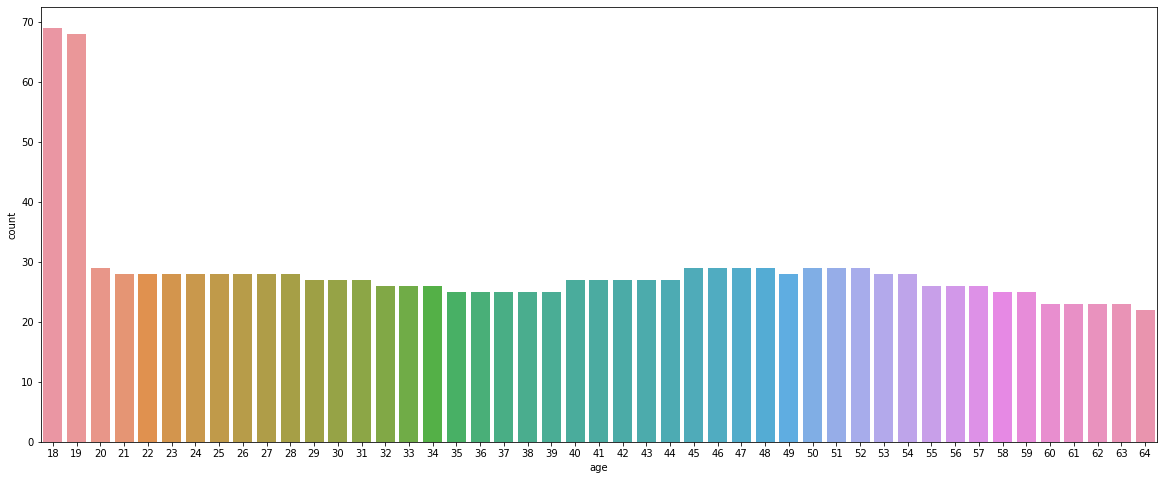

In [12]:
## Analysing age using count plot

plt.figure(figsize=(20,8))
sns.countplot(x='age',data=df)
plt.show()

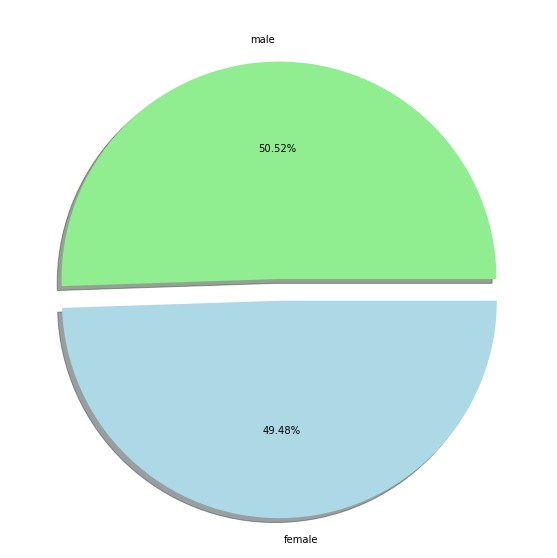

In [13]:
## Analysing sex
## Male vs Female ratio

plt.figure(figsize=(10,10))
labels=['male','female']
size=df['sex'].value_counts()
colors=['lightgreen','lightblue']
explode=[0,0.1]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

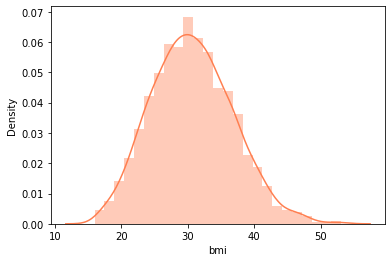

In [14]:
## Analysing bmi

sns.distplot(df.bmi,color='coral')

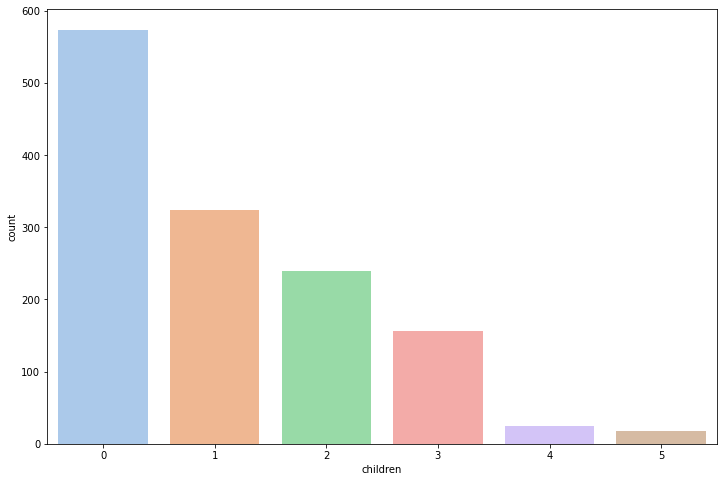

In [15]:
## Analysing children using count plot

plt.figure(figsize=(12,8))
sns.countplot(x='children',data=df,palette='pastel')
plt.show()

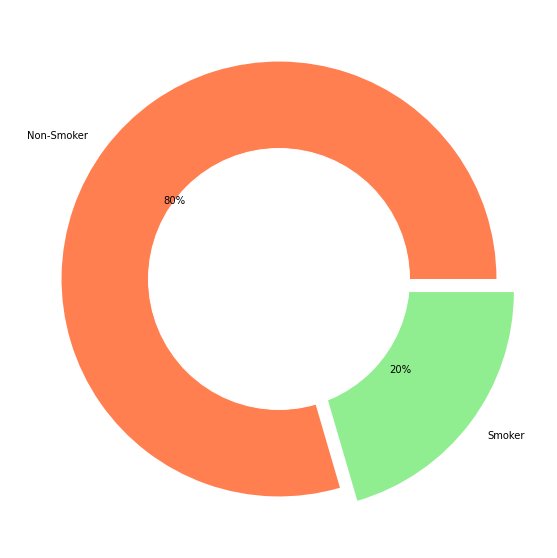

In [16]:
## Analysing smoker
## smoker vs non-smoker ratio 

plt.figure(figsize=(10,10))
labels=['Non-Smoker','Smoker']
size=df['smoker'].value_counts()
colors=['coral','lightgreen']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

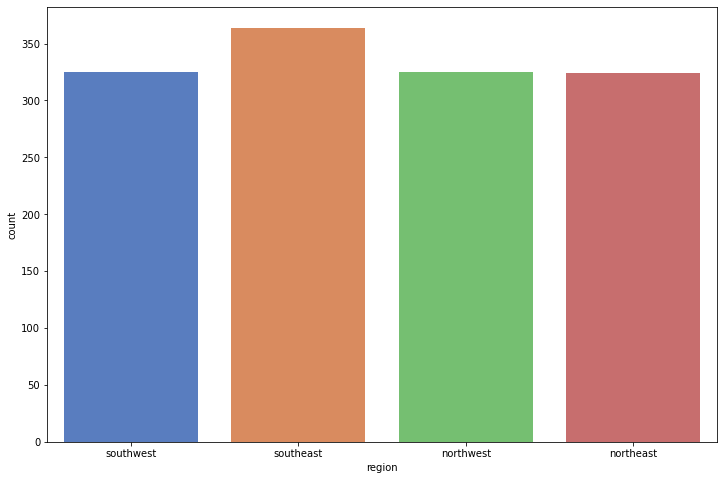

In [17]:
## Analysing region using count plot

plt.figure(figsize=(12,8))
sns.countplot(x='region',data=df,palette='muted')
plt.show()

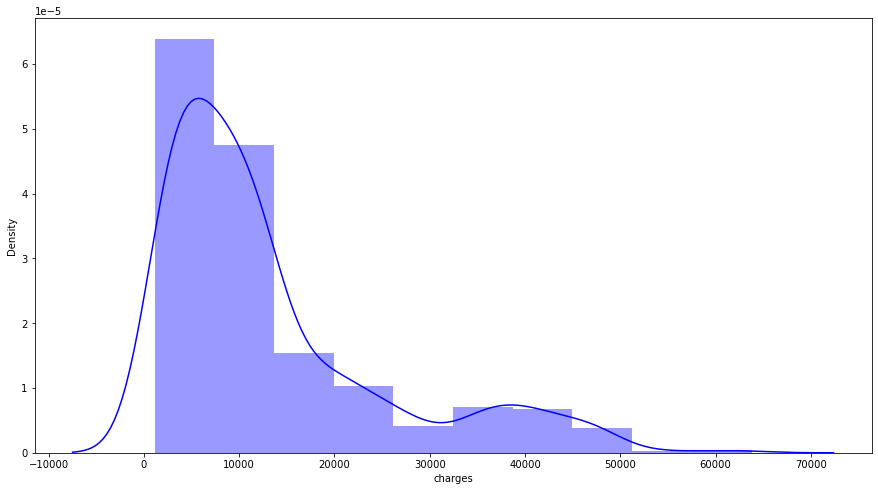

In [18]:
## Analysing charges 

plt.figure(figsize=(15,8))
sns.distplot(df.charges,color='blue',bins=10)
plt.show()

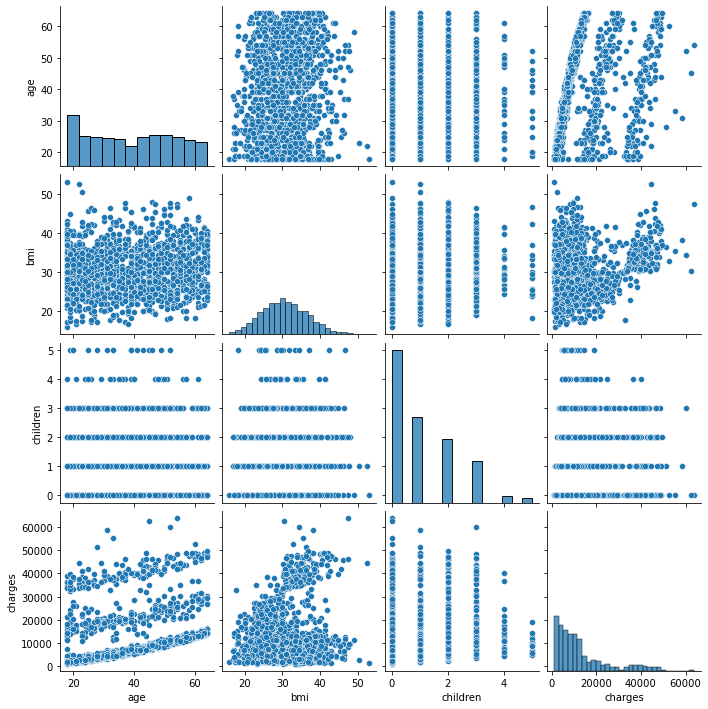

In [19]:
sns.pairplot(df)

## II. Data Preprocessing

In [20]:
print('There are',df.duplicated().sum(),'duplicate values in the dateset.')

There are 1 duplicate values in the dateset.


In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> Applying One-Hot Encoding to the categorical variables

In [22]:
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

In [23]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [24]:
Final_df = pd.concat([df_num, df_obj], axis=1)

In [25]:
df=Final_df

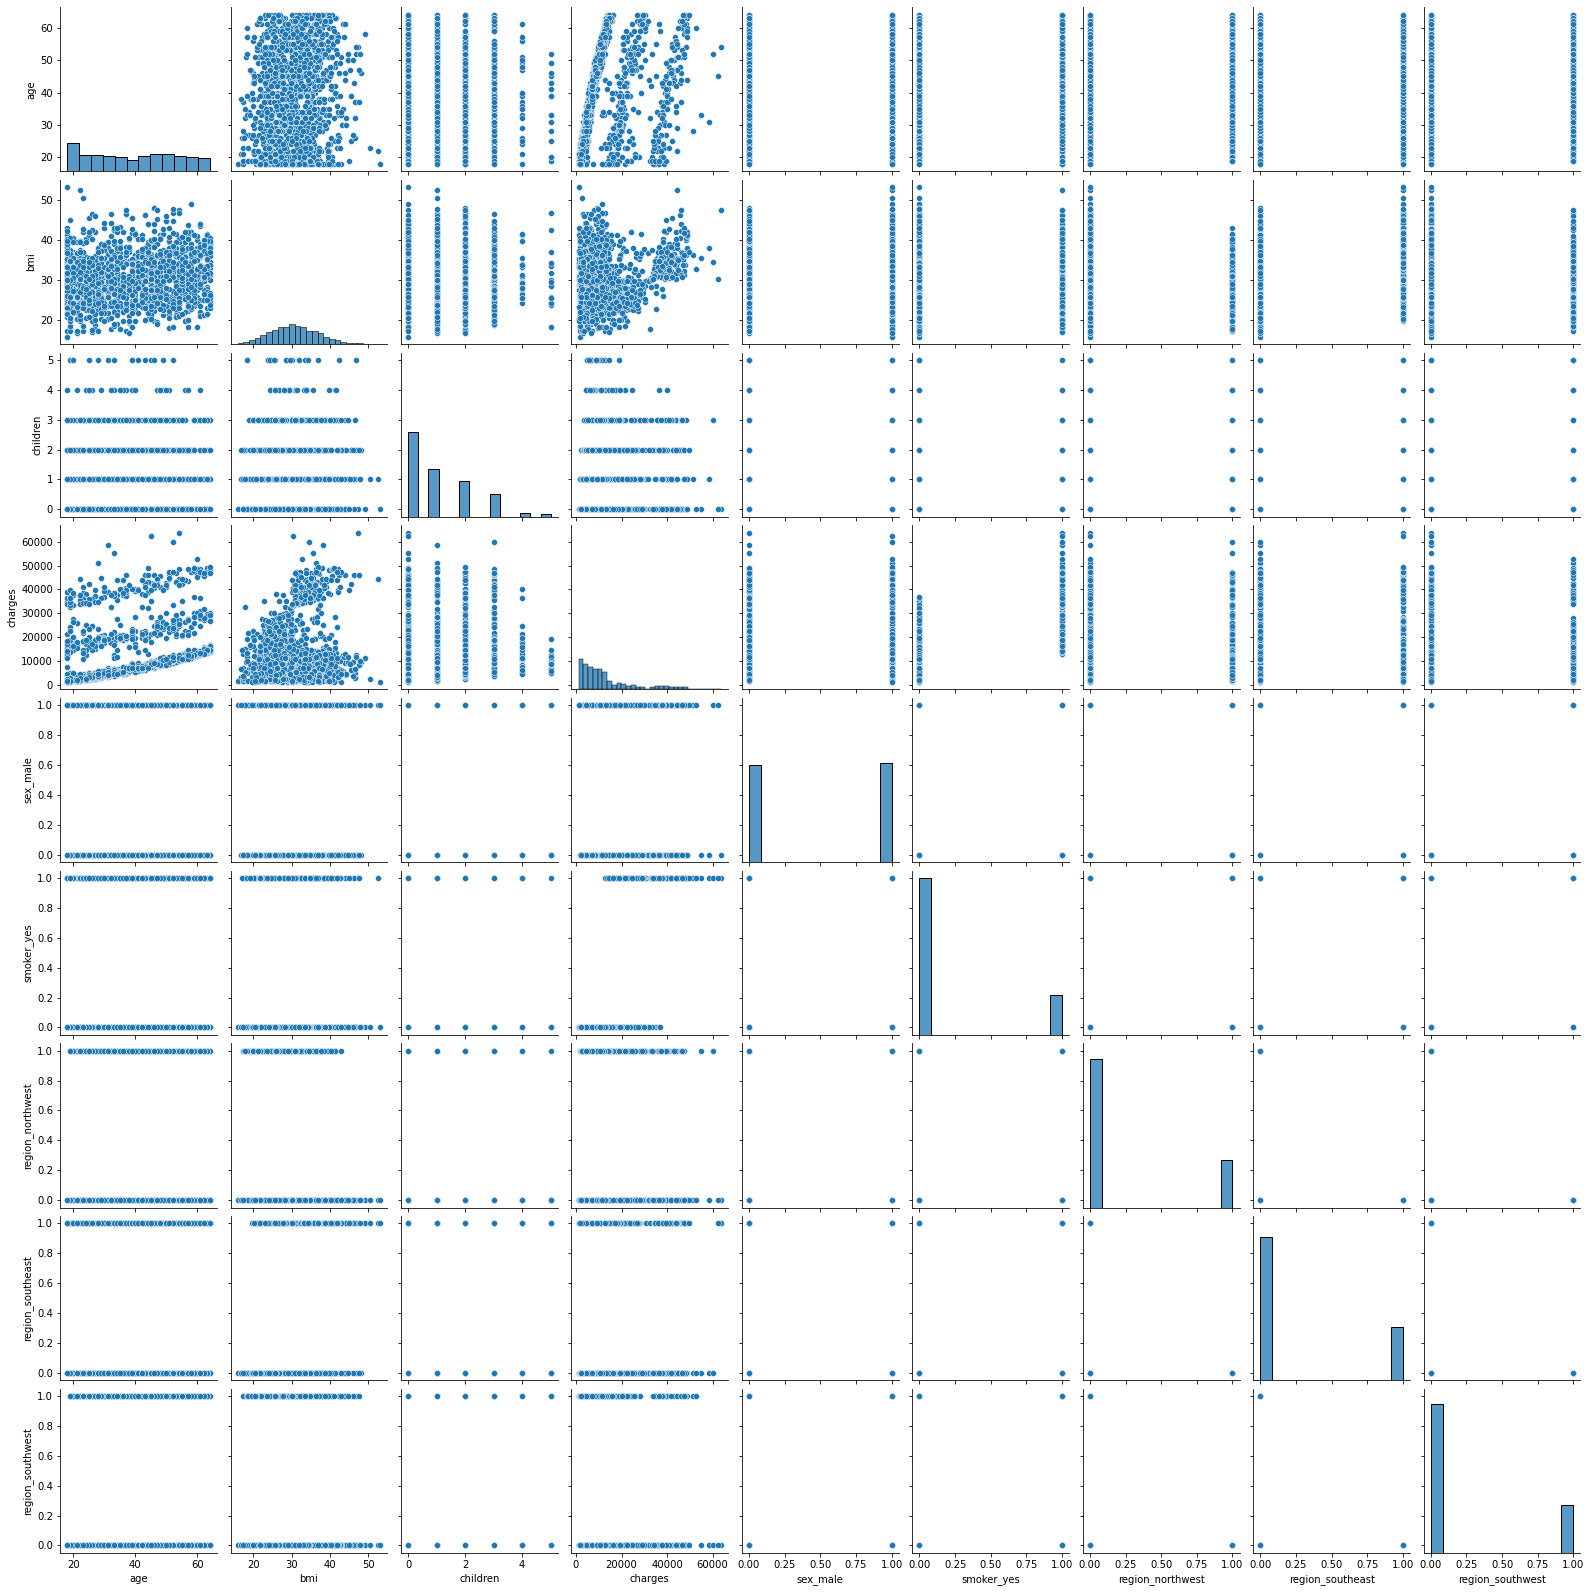

In [26]:
sns.pairplot(df)

In [47]:
# Save the cleansed dataframe to a csv file
df.to_csv('insurance_cleansed.csv', index=False)

## III. Data Training and Modeling

> Determine the Features & Target Variable

In [27]:
X=df.drop('charges', axis=1)

y=df['charges']

> Split the Dataset to Train & Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

### Train the Model using Linear Regression

> Train the Model using the X_train and y_train

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

> Coeficient Matrix

In [30]:
weights = lr.coef_
bias = lr.intercept_

print('We obtained the model parameters as follows:')
print('Weights: ', weights)
print('Bias: ', bias)

We obtained the model parameters as follows:
Weights:  [ 2.56350747e+02  3.68029306e+02  5.12388990e+02 -1.97922015e+01
  2.36919387e+04 -2.36814168e+02 -9.08898974e+02 -8.04884140e+02]
Bias:  -12839.593230696459


In [31]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coedicients'])

,Coedicients
age,256.350747
bmi,368.029306
children,512.388990
sex_male,-19.792201
smoker_yes,23691.938665
region_northwest,-236.814168
region_southeast,-908.898974
region_southwest,-804.884140


## IV. Data Evaluation

> Predict the Train and Test Data using Linear Regression Model

In [32]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

> Evaluate the Model using the Test Data

In [33]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  34604981.69941129
Mean absolute error:  4198.076076203972
R2 score:  0.7493450814560147


> Evaluate the Model using the Train Data

In [34]:
mse = metrics.mean_squared_error(y_train, y_train_pred)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  37406787.95438643
Mean absolute error:  4293.575212796095
R2 score:  0.7506634782740583


In [35]:
# show predicted and real profit
pd.DataFrame(list(zip(y_test_pred, y_test)), columns=['Predicted Charges', 'Real Charges'])

,Predicted Charges,Real Charges
0,16486.591928,15612.19335
1,4457.900864,2254.79670
2,27364.217647,16776.30405
3,5852.282380,16796.41194
4,6390.812853,4399.73100
...,...,...
397,1884.239661,1815.87590
398,13449.143057,13937.66650
399,3347.014700,3558.62025
400,3517.278028,1137.46970


> Predict the Test Data using Random Forest Regressor Model

In [36]:
y_test_pred = rfr.predict(X_test)
y_train_pred = rfr.predict(X_train)

> Evaluate the Model using the Test Data

In [37]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  22031039.58196069
Mean absolute error:  2643.2562216366996
R2 score:  0.8404221542486868


> Evaluate the Model using the Train Data

In [38]:
mse = metrics.mean_squared_error(y_train, y_train_pred)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  3668468.3395541217
Mean absolute error:  1072.04682187565
R2 score:  0.9755476696646201


In [39]:
# show predicted and real profit
pd.DataFrame(list(zip(y_test_pred, y_test)), columns=['Predicted Charges', 'Real Charges'])

,Predicted Charges,Real Charges
0,19079.190037,15612.19335
1,3122.237128,2254.79670
2,17436.468795,16776.30405
3,11789.190124,16796.41194
4,5577.632871,4399.73100
...,...,...
397,3470.429766,1815.87590
398,22430.459650,13937.66650
399,3749.957734,3558.62025
400,1708.162272,1137.46970


## V. Prediction using the Model

In [40]:
#Save the model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))

In [41]:
#Save the model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
pickle.dump(rfr_model, open('rfr_model.pkl', 'wb'))

In [42]:
# Load the Model:
lr_pickled_model = pickle.load(open('lr_model.pkl', 'rb'))
rfr_pickled_model = pickle.load(open('rfr_model.pkl', 'rb'))

> Predict a sample

In [43]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [44]:
sample=[[28, 25.760, 0, 1, 0, 1, 0, 0]]

In [45]:
lr_pickled_model.predict(sample)

array([3562.05622179])

In [46]:
rfr_pickled_model.predict(sample)

array([5393.8173367])